# Check issue with track cluster association


We (Michele and Dolores) think that the bad performance of the tagger comes from an issue in Pandora. The issue is that sometimes tracks get lost. I check this. 

**NOTE: this is miss classification NOT fake rate!!**

In [1]:
save_status = False

In [2]:
import uproot 
import numpy as np
import matplotlib.pyplot as plt

%load_ext autoreload
%autoreload 2

In [3]:
def load_data(file_name):
    file = uproot.open(file_name)
    tree = file['tree;1']
    data = tree.arrays(library="np", entry_start=0, entry_stop=1000000)
    return data

In [4]:
path= "/eos/experiment/fcc/ee/datasets/CLD_fullsim_tagging_trackPFOcheck/hadded_fakerate"
dic = {
    "bb": np.array([]),
    "gg": np.array([]),
    "tautau": np.array([])
}

for process in dic.keys():
    data = load_data(f"{path}/H{process}.root")
    dic[process] = data

In [5]:
dic["bb"].keys()

dict_keys(['recojet_isG', 'recojet_isU', 'recojet_isD', 'recojet_isS', 'recojet_isC', 'recojet_isB', 'recojet_isTAU', 'mcpid', 'mc_pfo_type', 'recopid', 'momentum', 'theta', 'energy', 'mc_track_found', 'pfo_recopid', 'pfo_momentum', 'pfo_theta', 'pfo_energy', 'pfo_MCpid', 'pfo_track'])

Ok, so **goal** for this notebook is to plot the fake rate (NOPE!)  missclassification for pfos. Next steps: 
- find index for e, mu, cha, nhad, photon in pfo `pfo_recopid`
- find good reco where `pfo_recopid` = `pfo_MCpid`
- plot 1 - fracation of good reco ( fake rate (NOPE!) missclassification) as a function of `pfo_theta` and `pfo_momentum` for different reco particle types: el, mu, chad, nhad, photons


In [6]:
np.unique(np.concatenate(dic["bb"]["pfo_recopid"])) 

array([-211,  -13,  -11,   11,   13,   22,  211, 2112], dtype=int32)

In [7]:
np.unique(abs(np.concatenate(dic["bb"]["pfo_MCpid"])), return_counts=True) 

(array([        11,         13,         22,        130,        211,
               310,        321,        411,        521,        999,
              2112,       2212,       3112,       3122,       3222,
              3312,       3322,       3334, 1000010020, 1000010030,
        1000020030, 1000020040], dtype=int32),
 array([ 3329534,   863057, 21184532,  1019567, 22518342,     2039,
         2941946,       63,       34,  1602761,   751943,  1331685,
           22169,     2378,    21511,    11624,      201,       75,
            3880,      325,       73,       95]))

In [8]:
def to_had(pfo_MCpid):
    num_chad = [3334, 3312, 3222, 3112, 2212, 411, 321, 211, 521, 1000010020, 1000010030, 1000020040] # change to 211
    num_nhad = [3322, 2112, 3122, 130, 310] # change to 2112
    i_chad = np.where(np.isin(abs(pfo_MCpid), num_chad))
    pfo_MCpid[i_chad] = np.sign(pfo_MCpid[i_chad]) * 211
    i_nhad = np.where(np.isin(abs(pfo_MCpid), num_nhad))
    pfo_MCpid[i_nhad] = 2112
    return pfo_MCpid

In [9]:
def index_good_reco(Htype, ignore_sign=False):
    pfo_recopid = np.concatenate(dic[Htype]["pfo_recopid"])
    pfo_MCpid = np.concatenate(dic[Htype]["pfo_MCpid"])
    pfo_MCpid = to_had(pfo_MCpid)
    # unitl here seems correct
    # print(np.unique(pfo_MCpid, return_counts=True))
    if ignore_sign:
        i_good_reco = np.where(abs(pfo_recopid) == abs(pfo_MCpid))
        i_wrong_reco = np.where(abs(pfo_recopid) != abs(pfo_MCpid))
        wrong_types, counts = np.unique(pfo_MCpid[i_wrong_reco], return_counts=True)
    else: 
        i_good_reco = np.where(pfo_recopid == pfo_MCpid)
        i_wrong_reco = np.where(pfo_recopid != pfo_MCpid)
        wrong_types, counts = np.unique(pfo_MCpid[i_wrong_reco], return_counts=True)
    return i_good_reco, i_wrong_reco

In [10]:
np.unique(np.concatenate(dic["bb"]["pfo_MCpid"]), return_counts=True) 

(array([     -3334,      -3322,      -3312,      -3222,      -3122,
             -3112,      -2212,      -2112,       -999,       -521,
              -411,       -321,       -211,        -13,        -11,
                11,         13,         22,        130,        211,
               310,        321,        411,        521,       2112,
              2212,       3112,       3122,       3222,       3312,
              3322,       3334, 1000010020, 1000010030, 1000020030,
        1000020040], dtype=int32),
 array([      34,       97,     5816,    10782,     1197,    11233,
          516312,   391111,  1602761,       12,       35,  1461674,
        11239811,   431441,  1639923,  1689611,   431616, 21184532,
         1019567, 11278531,     2039,  1480272,       28,       22,
          360832,   815373,    10936,     1181,    10729,     5808,
             104,       41,     3880,      325,       73,       95]))

In [11]:
print("no MC info: ", np.round((32314/len(np.concatenate(dic["bb"]["pfo_MCpid"])))*100, 3), " %")

no MC info:  0.058  %


In [12]:
np.unique(np.concatenate(dic["gg"]["pfo_MCpid"]), return_counts=True) 

(array([     -3334,      -3322,      -3312,      -3222,      -3122,
             -3112,      -2212,      -2112,       -999,       -411,
              -321,       -211,        -13,        -11,         11,
                13,         22,        130,        211,        310,
               321,        411,        521,       2112,       2212,
              3112,       3122,       3222,       3312,       3322,
              3334, 1000010020, 1000010030, 1000020030, 1000020040],
       dtype=int32),
 array([     137,       84,    10641,    20444,     1597,    26842,
         1000266,   802403,  1570972,        1,  1634154, 15944572,
          315587,  1659100,  1721624,   316571, 26903151,  1160058,
        16011005,     1815,  1655771,        3,        1,   686698,
         1356064,    26326,     1577,    20177,    10453,       94,
             132,     5702,      516,      122,      171]))

In [13]:
print("no MC info: ", np.round((31324/len(np.concatenate(dic["gg"]["pfo_MCpid"])))*100, 3), " %")

no MC info:  0.043  %


In [14]:
np.unique(np.concatenate(dic["tautau"]["pfo_MCpid"]), return_counts=True) 

(array([     -3322,      -3222,      -3122,      -3112,      -2212,
             -2112,       -999,       -321,       -211,        -15,
               -13,        -11,         11,         13,         15,
                22,        130,        211,        310,        321,
              2112,       2212,       3112,       3122,       3222,
              3312, 1000010020, 1000010030, 1000020030, 1000020040],
       dtype=int32),
 array([      1,       5,      12,       1,     621,     455,  217966,
          29385, 1126972,       9,  188401,  491126,  498926,  188504,
              2, 2547363,   22436, 1128122,    1110,   30170,   17330,
          44969,       8,      37,       8,       1,     413,      60,
             13,      23]))

In [15]:
print("no MC info: ", np.round((4439/len(np.concatenate(dic["tautau"]["pfo_MCpid"])))*100, 3), " %")

no MC info:  0.068  %


In [16]:
def ind_ptype(Htype):
    ind_e = np.where(abs(np.concatenate(dic[Htype]["pfo_recopid"])) == 11)
    ind_mu = np.where(abs(np.concatenate(dic[Htype]["pfo_recopid"])) == 13)
    ind_chad = np.where(abs(np.concatenate(dic[Htype]["pfo_recopid"])) == 211)
    ind_gamma = np.where(abs(np.concatenate(dic[Htype]["pfo_recopid"])) == 22)
    ind_nhad = np.where(abs(np.concatenate(dic[Htype]["pfo_recopid"])) == 2112)
    return ind_e, ind_mu, ind_chad, ind_gamma, ind_nhad

In [17]:
from functools import reduce

In [18]:
# Normalize function
def normalize_hist(data, ref_counts, bins, range):
    counts, _ = np.histogram(data, bins=bins, range=range, density=False)
    # Avoid division by zero by using np.where
    normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)
    return normalized_counts

In [19]:
def fake_rate(Htype, ignore_sign=False):
    pfo_recopid = np.concatenate(dic[Htype]["pfo_recopid"])
    i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=ignore_sign)
    if len(pfo_recopid) != (len(i_good_reco[0]) + len(i_wrong_reco[0])):
        raise ValueError("The number of good and wrong reco particles does not match the total number of particles")
    fakerate = len(i_wrong_reco[0]) / (len(i_good_reco[0]) + len(i_wrong_reco[0]))
    return fakerate
    

In [20]:
def fake_rate_x(Htype, ind_ptype, ind_ptype_fake):
    """missclassification for e, mu, chad, gamma, nhad"""
    num_x = len(np.concatenate(dic[Htype]["pfo_recopid"])[ind_ptype])
    num_fake_and_x = len(np.concatenate(dic[Htype]["pfo_recopid"])[ind_ptype_fake])
    return num_fake_and_x / num_x



In [21]:
def plot_fakerate(Htype, log_p = False, save=False, ign_sg = True):
    num_bins=50
    i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=ign_sg)
    i_ptype = ind_ptype(Htype)
    labels = ["e", "muon", "chad", "photon", "nhad"]
    ranges = [[0, 60], [0, 3.14]]
    fig, ax = plt.subplots(2, 5, figsize=(23, 5))
    fig.suptitle(f"H{Htype} missclassification ({np.round(fake_rate(Htype, ignore_sign=ign_sg)*100, 1)} %)")
    for i in range(5):
        for j, obs in enumerate(["pfo_momentum", "pfo_theta"]):
            # Logarithmic binning for "momentum"
            if obs == "pfo_momentum" and log_p:
                bins = np.logspace(np.log10(ranges[j][0]+1e-1), np.log10(ranges[j][1]), num_bins)
                ax[j, i].set_xscale("log")
            else:
                bins = np.linspace(ranges[j][0], ranges[j][1], num_bins)



            ref_counts, bin_edges = np.histogram(np.concatenate(dic[Htype][obs])[i_ptype[i]], range=ranges[j], bins=bins, density=False)
            
            ind_interest = np.intersect1d(i_wrong_reco, i_ptype[i])
            # check which is the highest confusion
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])[ind_interest])
            wrong_pid, counts = np.unique(abs(pfo_MCpid), return_counts=True)
            confusion = wrong_pid[np.argmax(counts)]
            # plot
            obs_data = np.concatenate(dic[Htype][obs])[ind_interest]
            normalized_obs_data = normalize_hist(obs_data, ref_counts, bins, range=ranges[j])
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting
            fakerate_ptype = fake_rate_x(Htype, i_ptype[i], ind_interest)
            ax[j, i].set_title(f"missclassification for {labels[i]}: {np.round(fakerate_ptype*100, 1)} %")
            ax[j, i].plot(bin_centers, normalized_obs_data, drawstyle='steps-mid', linewidth=2.0, label=f"{labels[i]} ({np.round(np.max(counts)*100/np.sum(counts), 1)} % confused with {confusion}" )#, label=f"MC {xtype}, track ({effi[2]} %)")
            ax[j, i].set_xlabel(f"{obs}")
            ax[j, i].set_ylabel("missclassification")

            #ax[j, i].hist(np.concatenate(dic[Htype]["pfo_momentum"])[i_ptype[i]], bins=100, histtype='step', label=labels[i])
            ax[j, i].grid()
            ax[j, i].legend()
            ax[j, i].set_ylim(0, 1.01)
            #ax[j, i].set_yscale('log')
    if save:
        plt.savefig(f"./hist-trackPFOcheck-missclassi/missclassi_H{Htype}.pdf")
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


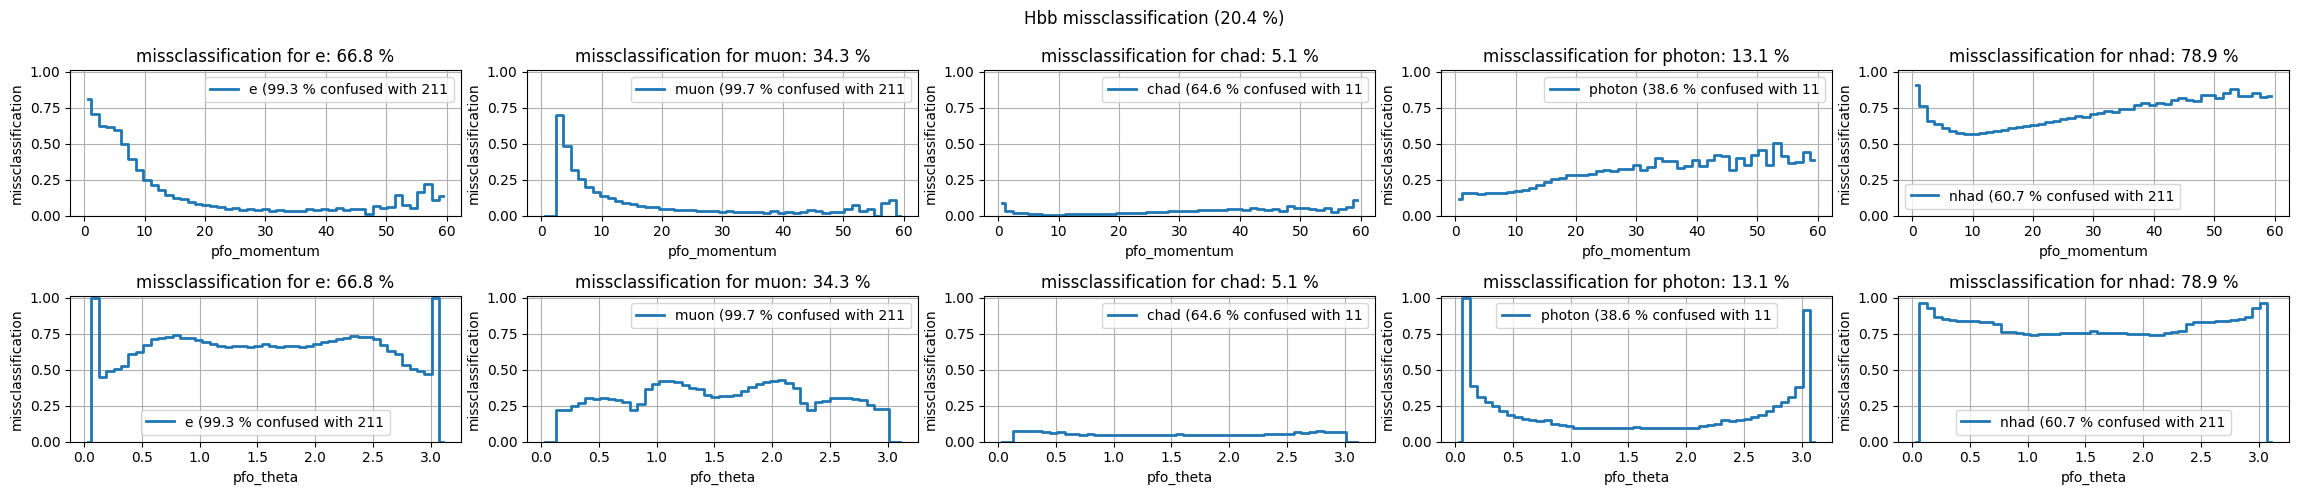

In [22]:
plot_fakerate("bb", save=save_status)

/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


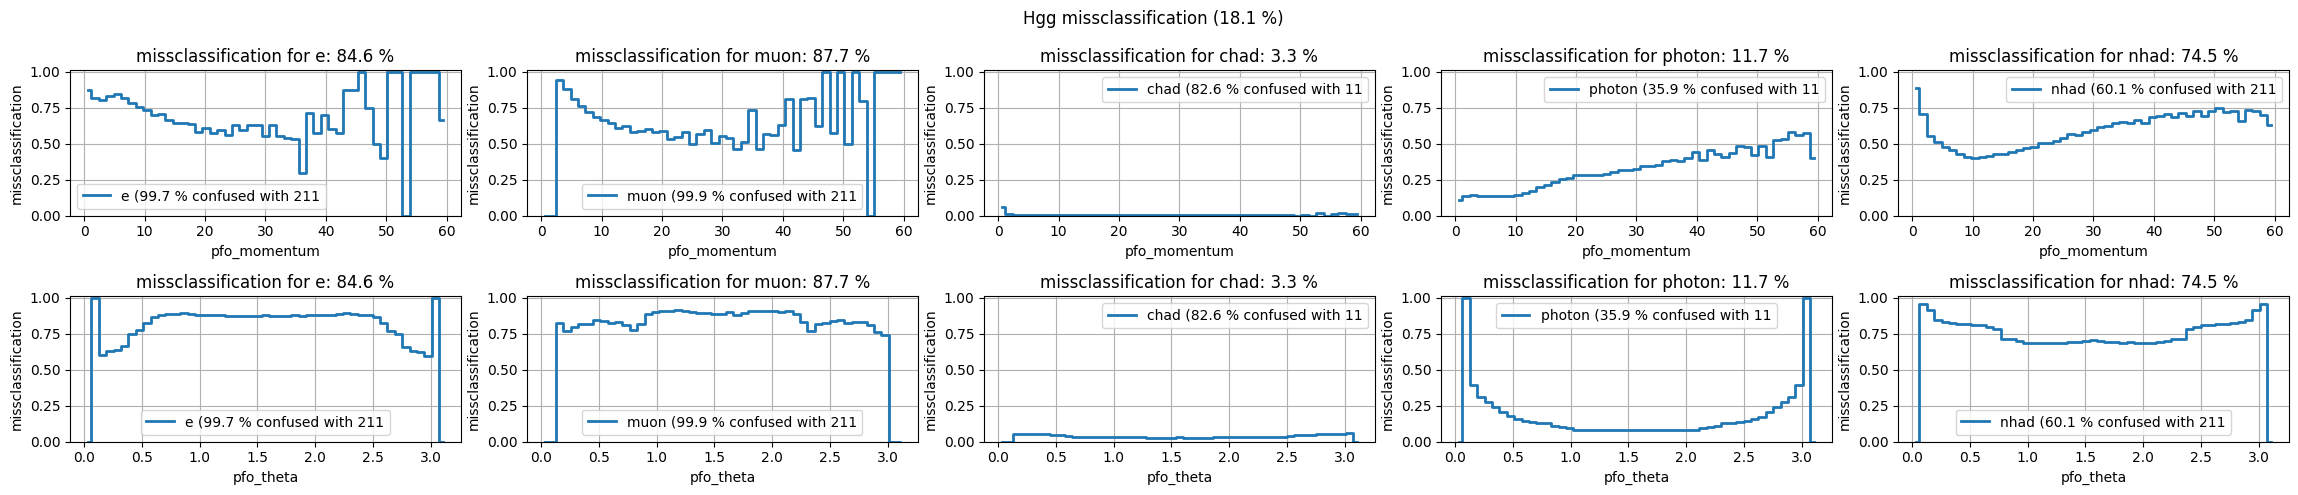

In [23]:
plot_fakerate("gg", save=save_status)

/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


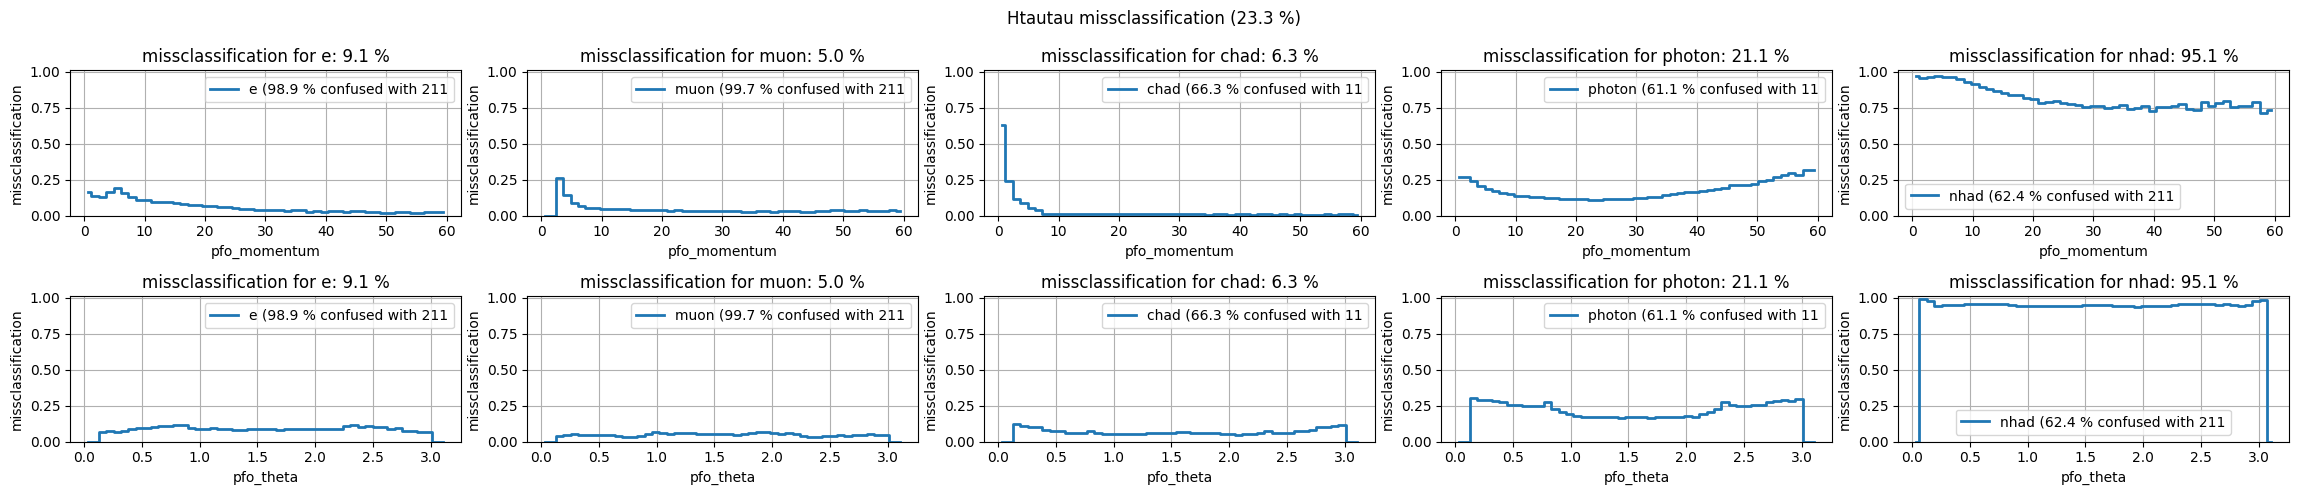

In [24]:
plot_fakerate("tautau", save=save_status)

Continue with: 
- what part of missclassification is not identified, what part is highest confusion?  Do that for neural hadrons!

In [25]:
# create plot for neutral hadrons only 

def plot_fakerate_nhad(log_p = True, save=False):
    num_bins=50
    #labels = ["e", "muon", "chad", "photon", "nhad"]
    labels = ["bb", "gg", "tautau"]
    ranges = [[0, 60], [0, 3.14]]
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    #fig.suptitle(f"{Htype} missclassification ({np.round(fake_rate(Htype)*100, 1)} %)")
    fig.suptitle(f"nhad missclassification")
    for i, Htype in enumerate(labels):
        i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=False)
        ind_e, ind_mu, ind_chad, ind_gamma, ind_nhad = ind_ptype(Htype)
        i_ptype = ind_nhad
        for j, obs in enumerate(["pfo_momentum", "pfo_theta"]):
            # Logarithmic binning for "momentum"
            if obs == "pfo_momentum" and log_p:
                bins = np.logspace(np.log10(ranges[j][0]+2e-1), np.log10(ranges[j][1]), num_bins)
                ax[j, i].set_xscale("log")
            else:
                bins = np.linspace(ranges[j][0], ranges[j][1], num_bins)

            ref_counts, bin_edges = np.histogram(np.concatenate(dic[Htype][obs])[i_ptype], range=ranges[j], bins=bins, density=False)
            ind_interest = np.intersect1d(i_wrong_reco, i_ptype)
            
            # check which is the highest confusion
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])[ind_interest])
            wrong_pid, counts = np.unique(abs(pfo_MCpid), return_counts=True)
            
            per_chad = np.round(counts[np.where(wrong_pid==211)]*100/np.sum(counts), 1)
            per_noID= np.round(counts[np.where(wrong_pid==999)]*100/np.sum(counts), 1)

            # plot histo
            obs_data = np.concatenate(dic[Htype][obs])[ind_interest]
            normalized_obs_data = normalize_hist(obs_data, ref_counts, bins, range=ranges[j])
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting
            fakerate_ptype = fake_rate_x(Htype, i_ptype, ind_interest)
            ax[j, i].set_title(f"missclassification for H{labels[i]}: {np.round(fakerate_ptype*100, 1)} %")
            ax[j, i].plot(bin_centers, normalized_obs_data, drawstyle='steps-mid', linewidth=2.0, label=f"pfo nhad")#, label=f"MC {xtype}, track ({effi[2]} %)")
            ax[j, i].set_xlabel(f"{obs}")
            ax[j, i].set_ylabel("missclassification")

            # plots fractions for 221 and -999
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])) 
            ind_211 = np.where(abs(pfo_MCpid) == 211)
            ind_nhad_act_chad = np.intersect1d(ind_interest, ind_211)
            ind_999 = np.where(abs(pfo_MCpid) == 999)
            ind_nhad_not_reco = np.intersect1d(ind_interest, ind_999)

            act_chad_data = np.concatenate(dic[Htype][obs])[ind_nhad_act_chad]
            normalized_act_chad_data = normalize_hist(act_chad_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_act_chad_data, drawstyle='steps-mid', linewidth=2.0, label=f"MC = chad ({per_chad[0]} % of missclassification)" )

            not_reco_data = np.concatenate(dic[Htype][obs])[ind_nhad_not_reco]
            normalized_not_reco_data = normalize_hist(not_reco_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_not_reco_data, drawstyle='steps-mid', linewidth=2.0, label=f"no MC associated ({per_noID[0]} % of missclassification)" )




            #ax[j, i].hist(np.concatenate(dic[Htype]["pfo_momentum"])[i_ptype], bins=100, histtype='step', label=labels[i])
            ax[j, i].grid()
            ax[j, i].legend()
            ax[j, i].set_ylim(0, 1.01)
            #ax[j, i].set_yscale('log')
    if save:
        plt.savefig(f"./hist-trackPFOcheck-missclassi/missclassi_nhad.pdf")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


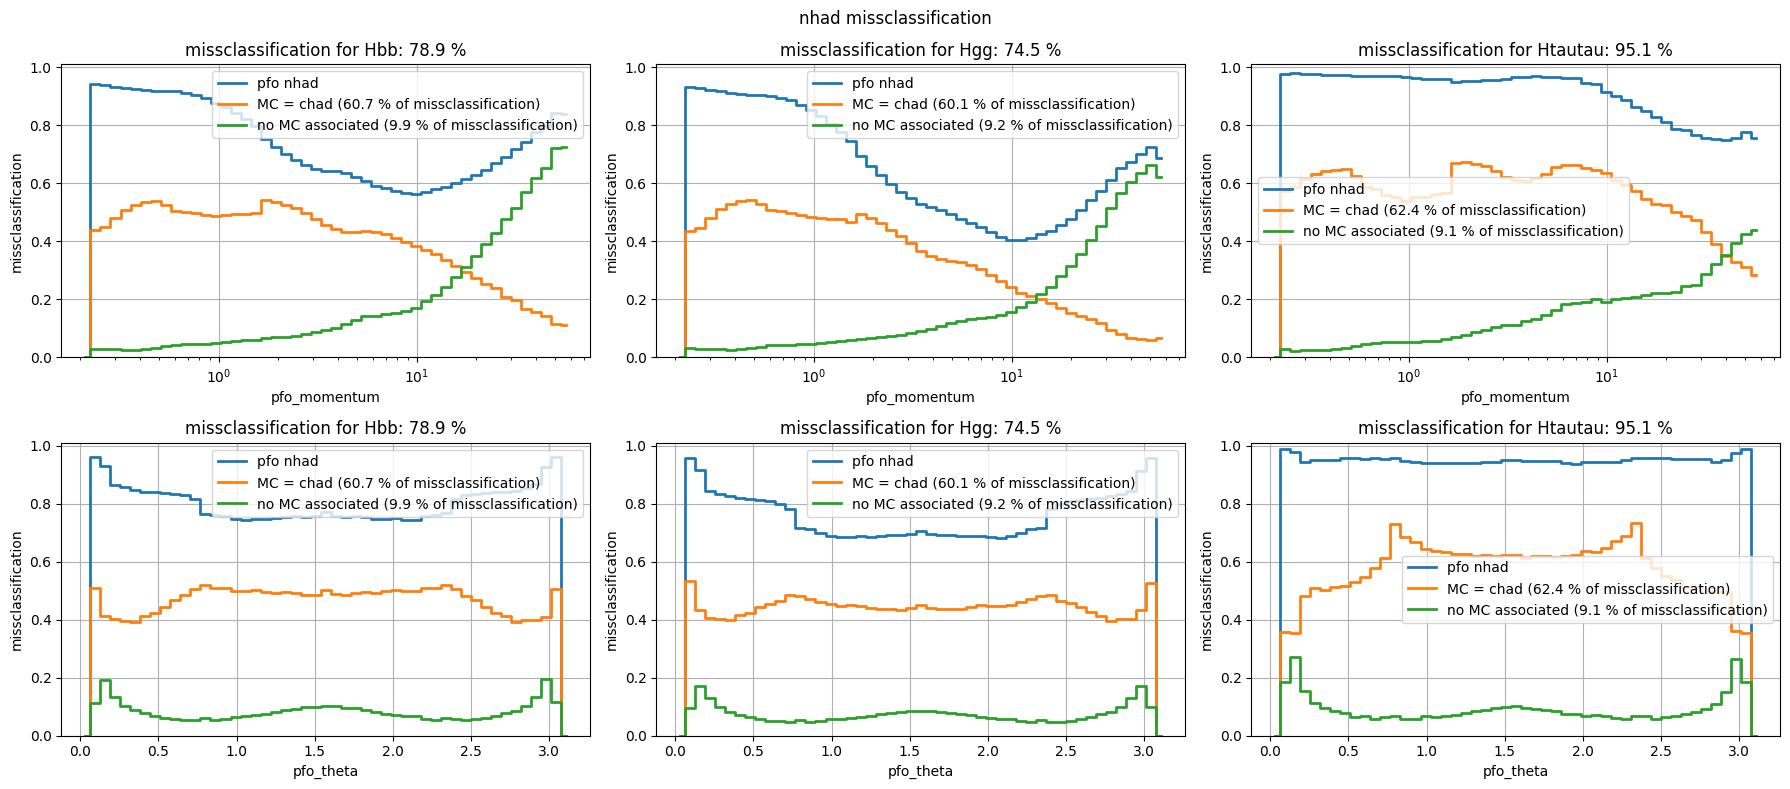

In [26]:
plot_fakerate_nhad(log_p=True, save=save_status)

- as nhad most often confused with 211 (charged hadron) I will plot that line
- and will plot -999 just to see where reco does bullshit too



* no MC associated means that not more than 70 % of the pfo signal is associated to a single MC 

In [27]:
# create plot for neutral hadrons only 

def plot_fakerate_muon(log_p = True, save=False):
    num_bins=50
    #labels = ["e", "muon", "chad", "photon", "nhad"]
    labels = ["bb", "gg", "tautau"]
    ranges = [[2, 60], [0, 3.14]]
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    #fig.suptitle(f"{Htype} missclassification ({np.round(fake_rate(Htype)*100, 1)} %)")
    fig.suptitle(f"muon missclassification")
    for i, Htype in enumerate(labels):
        i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=False)
        ind_e, ind_mu, ind_chad, ind_gamma, ind_nhad = ind_ptype(Htype)
        i_ptype = ind_mu
        for j, obs in enumerate(["pfo_momentum", "pfo_theta"]):
            # Logarithmic binning for "momentum"
            if obs == "pfo_momentum" and log_p:
                bins = np.logspace(np.log10(ranges[j][0]+1e-1), np.log10(ranges[j][1]), num_bins)
                ax[j, i].set_xscale("log")
            else:
                bins = np.linspace(ranges[j][0], ranges[j][1], num_bins)

            ref_counts, bin_edges = np.histogram(np.concatenate(dic[Htype][obs])[i_ptype], range=ranges[j], bins=bins, density=False)
            ind_interest = np.intersect1d(i_wrong_reco, i_ptype)
            
            # check which is the highest confusion
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])[ind_interest])
            wrong_pid, counts = np.unique(abs(pfo_MCpid), return_counts=True)
            
            per_chad = np.round(counts[np.where(wrong_pid==211)]*100/np.sum(counts), 1)
            per_noID= np.round(counts[np.where(wrong_pid==999)]*100/np.sum(counts), 1)

            # plot histo
            obs_data = np.concatenate(dic[Htype][obs])[ind_interest]
            normalized_obs_data = normalize_hist(obs_data, ref_counts, bins, range=ranges[j])
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting
            fakerate_ptype = fake_rate_x(Htype, i_ptype, ind_interest)
            ax[j, i].set_title(f"missclassification for H{labels[i]}: {np.round(fakerate_ptype*100, 1)} %")
            ax[j, i].plot(bin_centers, normalized_obs_data, drawstyle='steps-mid', linewidth=2.0, label=f"pfo muon")#, label=f"MC {xtype}, track ({effi[2]} %)")
            ax[j, i].set_xlabel(f"{obs}")
            ax[j, i].set_ylabel("missclassification")

            # plots fractions for 221 and -999
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])) 
            ind_211 = np.where(abs(pfo_MCpid) == 211)
            ind_nhad_act_chad = np.intersect1d(ind_interest, ind_211)
            ind_999 = np.where(abs(pfo_MCpid) == 999)
            ind_nhad_not_reco = np.intersect1d(ind_interest, ind_999)

            act_chad_data = np.concatenate(dic[Htype][obs])[ind_nhad_act_chad]
            normalized_act_chad_data = normalize_hist(act_chad_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_act_chad_data, drawstyle='steps-mid', linewidth=2.0, label=f"MC = chad ({per_chad[0]} % of missclassification)" )

            not_reco_data = np.concatenate(dic[Htype][obs])[ind_nhad_not_reco]
            normalized_not_reco_data = normalize_hist(not_reco_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_not_reco_data, drawstyle='steps-mid', linewidth=2.0, label=f"no MC associated ({per_noID[0]} % of missclassification)" )




            #ax[j, i].hist(np.concatenate(dic[Htype]["pfo_momentum"])[i_ptype], bins=100, histtype='step', label=labels[i])
            ax[j, i].grid()
            ax[j, i].legend()
            ax[j, i].set_ylim(0, 1.01)
            #ax[j, i].set_yscale('log')
    if save:
        plt.savefig(f"./hist-trackPFOcheck-missclassi/missclassi_muon.pdf")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


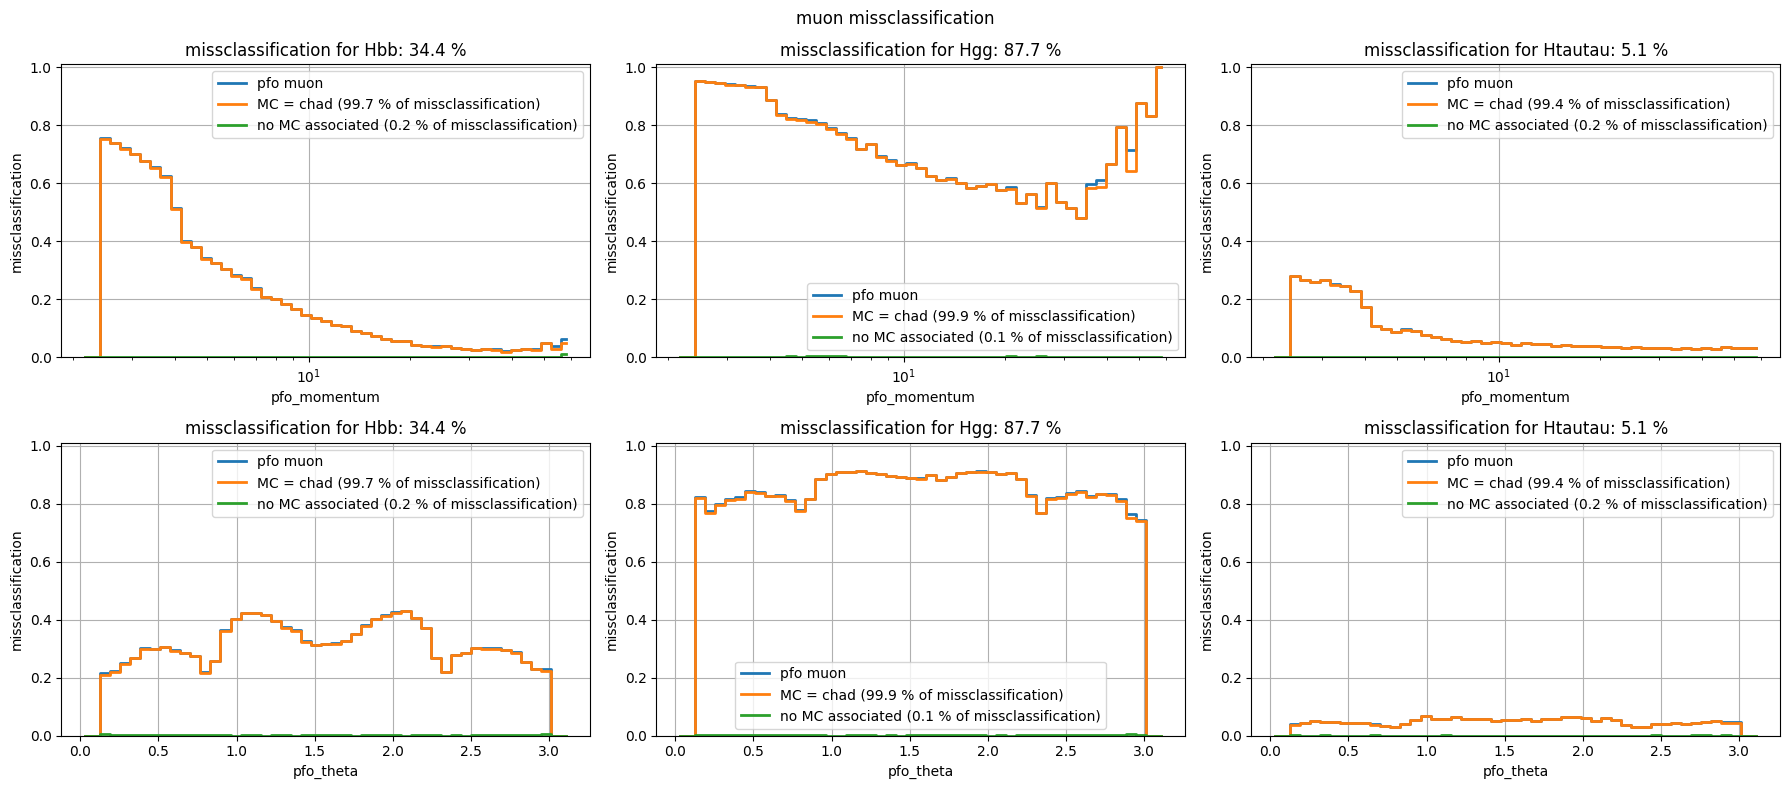

In [28]:
plot_fakerate_muon()

Well, so basically all pfo muons that are not MC muons are MC charged hadrons

In [29]:
# create plot for neutral hadrons only 

def plot_fakerate_electron(log_p = True, save=False):
    num_bins=50
    #labels = ["e", "muon", "chad", "photon", "nhad"]
    labels = ["bb", "gg", "tautau"]
    ranges = [[0, 60], [0, 3.14]]
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    #fig.suptitle(f"{Htype} missclassification ({np.round(fake_rate(Htype)*100, 1)} %)")
    fig.suptitle(f"el missclassification")
    for i, Htype in enumerate(labels):
        i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=False)
        ind_e, ind_mu, ind_chad, ind_gamma, ind_nhad = ind_ptype(Htype)
        i_ptype = ind_e
        for j, obs in enumerate(["pfo_momentum", "pfo_theta"]):
            # Logarithmic binning for "momentum"
            if obs == "pfo_momentum" and log_p:
                bins = np.logspace(np.log10(ranges[j][0]+1e-1), np.log10(ranges[j][1]), num_bins)
                ax[j, i].set_xscale("log")
            else:
                bins = np.linspace(ranges[j][0], ranges[j][1], num_bins)

            ref_counts, bin_edges = np.histogram(np.concatenate(dic[Htype][obs])[i_ptype], range=ranges[j], bins=bins, density=False)
            ind_interest = np.intersect1d(i_wrong_reco, i_ptype)
            
            # check which is the highest confusion
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])[ind_interest])
            wrong_pid, counts = np.unique(abs(pfo_MCpid), return_counts=True)
            
            per_chad = np.round(counts[np.where(wrong_pid==211)]*100/np.sum(counts), 1)
            per_noID= np.round(counts[np.where(wrong_pid==999)]*100/np.sum(counts), 1)

            # plot histo
            obs_data = np.concatenate(dic[Htype][obs])[ind_interest]
            normalized_obs_data = normalize_hist(obs_data, ref_counts, bins, range=ranges[j])
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting
            fakerate_ptype = fake_rate_x(Htype, i_ptype, ind_interest)
            ax[j, i].set_title(f"missclassification for H{labels[i]}: {np.round(fakerate_ptype*100, 1)} %")
            ax[j, i].plot(bin_centers, normalized_obs_data, drawstyle='steps-mid', linewidth=2.0, label=f"pfo e")#, label=f"MC {xtype}, track ({effi[2]} %)")
            ax[j, i].set_xlabel(f"{obs}")
            ax[j, i].set_ylabel("missclassification")

            # plots fractions for 221 and -999
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])) 
            ind_211 = np.where(abs(pfo_MCpid) == 211)
            ind_nhad_act_chad = np.intersect1d(ind_interest, ind_211)
            ind_999 = np.where(abs(pfo_MCpid) == 999)
            ind_nhad_not_reco = np.intersect1d(ind_interest, ind_999)

            act_chad_data = np.concatenate(dic[Htype][obs])[ind_nhad_act_chad]
            normalized_act_chad_data = normalize_hist(act_chad_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_act_chad_data, drawstyle='steps-mid', linewidth=2.0, label=f"MC = chad ({per_chad[0]} % of missclassification)" )

            not_reco_data = np.concatenate(dic[Htype][obs])[ind_nhad_not_reco]
            normalized_not_reco_data = normalize_hist(not_reco_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_not_reco_data, drawstyle='steps-mid', linewidth=2.0, label=f"no MC associated ({per_noID[0]} % of missclassification)" )




            #ax[j, i].hist(np.concatenate(dic[Htype]["pfo_momentum"])[i_ptype], bins=100, histtype='step', label=labels[i])
            ax[j, i].grid()
            ax[j, i].legend()
            ax[j, i].set_ylim(0, 1.01)
            #ax[j, i].set_yscale('log')
    if save:
        plt.savefig(f"./hist-trackPFOcheck-missclassi/missclassi_el.pdf")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


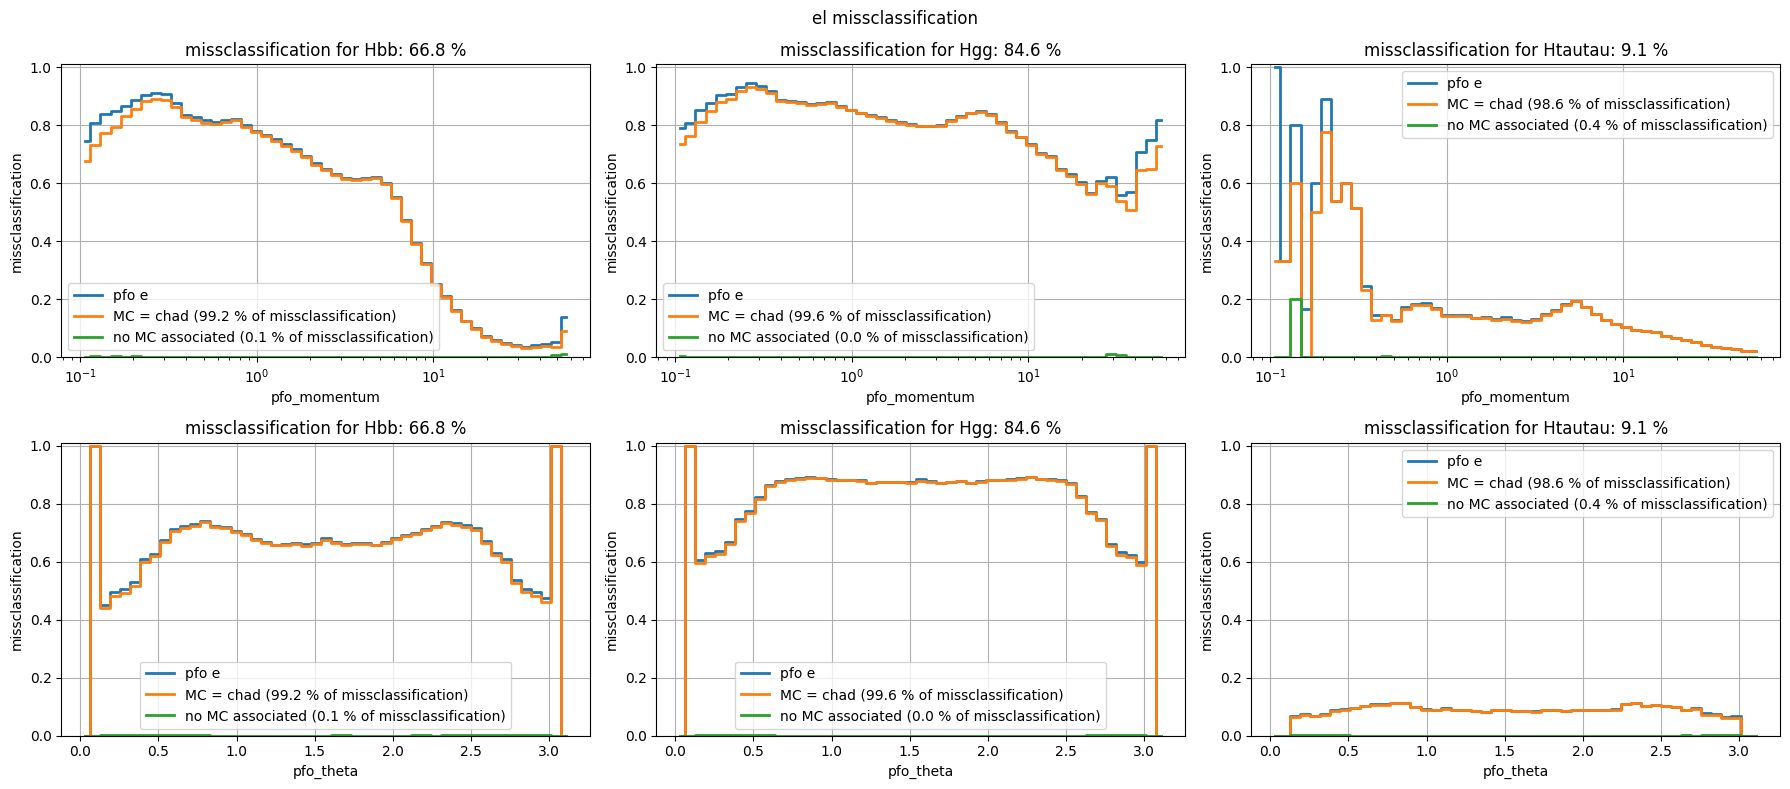

In [30]:
plot_fakerate_electron(save=save_status)

Well, so also basically all pfo electrons which are no MC electrons are MC chad

In [31]:
# create plot for neutral hadrons only 

def plot_fakerate_chad(log_p = True, save=False):
    num_bins=50
    #labels = ["e", "muon", "chad", "photon", "nhad"]
    labels = ["bb", "gg", "tautau"]
    ranges = [[0, 60], [0, 3.14]]
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    #fig.suptitle(f"{Htype} missclassification ({np.round(fake_rate(Htype)*100, 1)} %)")
    fig.suptitle(f"chad missclassification")
    for i, Htype in enumerate(labels):
        i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=False)
        ind_e, ind_mu, ind_chad, ind_gamma, ind_nhad = ind_ptype(Htype)
        i_ptype = ind_chad
        for j, obs in enumerate(["pfo_momentum", "pfo_theta"]):
            # Logarithmic binning for "momentum"
            if obs == "pfo_momentum" and log_p:
                bins = np.logspace(np.log10(ranges[j][0]+1e-1), np.log10(ranges[j][1]), num_bins)
                ax[j, i].set_xscale("log")
            else:
                bins = np.linspace(ranges[j][0], ranges[j][1], num_bins)

            ref_counts, bin_edges = np.histogram(np.concatenate(dic[Htype][obs])[i_ptype], range=ranges[j], bins=bins, density=False)
            ind_interest = np.intersect1d(i_wrong_reco, i_ptype)
            
            # check which is the highest confusion
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])[ind_interest])
            wrong_pid, counts = np.unique(abs(pfo_MCpid), return_counts=True)
            
            per_el = np.round(counts[np.where(wrong_pid==11)]*100/np.sum(counts), 1)
            per_noID= np.round(counts[np.where(wrong_pid==999)]*100/np.sum(counts), 1)

            # plot histo
            obs_data = np.concatenate(dic[Htype][obs])[ind_interest]
            normalized_obs_data = normalize_hist(obs_data, ref_counts, bins, range=ranges[j])
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting
            fakerate_ptype = fake_rate_x(Htype, i_ptype, ind_interest)
            ax[j, i].set_title(f"missclassification for H{labels[i]}: {np.round(fakerate_ptype*100, 1)} %")
            ax[j, i].plot(bin_centers, normalized_obs_data, drawstyle='steps-mid', linewidth=2.0, label=f"pfo chad")#, label=f"MC {xtype}, track ({effi[2]} %)")
            ax[j, i].set_xlabel(f"{obs}")
            ax[j, i].set_ylabel("missclassification")

            # plots fractions for 221 and -999
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])) 
            ind_211 = np.where(abs(pfo_MCpid) == 211)
            ind_nhad_act_chad = np.intersect1d(ind_interest, ind_211)
            ind_999 = np.where(abs(pfo_MCpid) == 999)
            ind_nhad_not_reco = np.intersect1d(ind_interest, ind_999)

            act_chad_data = np.concatenate(dic[Htype][obs])[ind_nhad_act_chad]
            normalized_act_chad_data = normalize_hist(act_chad_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_act_chad_data, drawstyle='steps-mid', linewidth=2.0, label=f"MC = e ({per_el[0]} % of missclassification)" )

            not_reco_data = np.concatenate(dic[Htype][obs])[ind_nhad_not_reco]
            normalized_not_reco_data = normalize_hist(not_reco_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_not_reco_data, drawstyle='steps-mid', linewidth=2.0, label=f"no MC associated ({per_noID[0]} % of missclassification)" )




            #ax[j, i].hist(np.concatenate(dic[Htype]["pfo_momentum"])[i_ptype], bins=100, histtype='step', label=labels[i])
            ax[j, i].grid()
            ax[j, i].legend()
            #ax[j, i].set_ylim(0, 1.01)
            ax[j, i].set_yscale('log')
    if save:
        plt.savefig(f"./hist-trackPFOcheck-missclassi/missclassi_chad.pdf")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


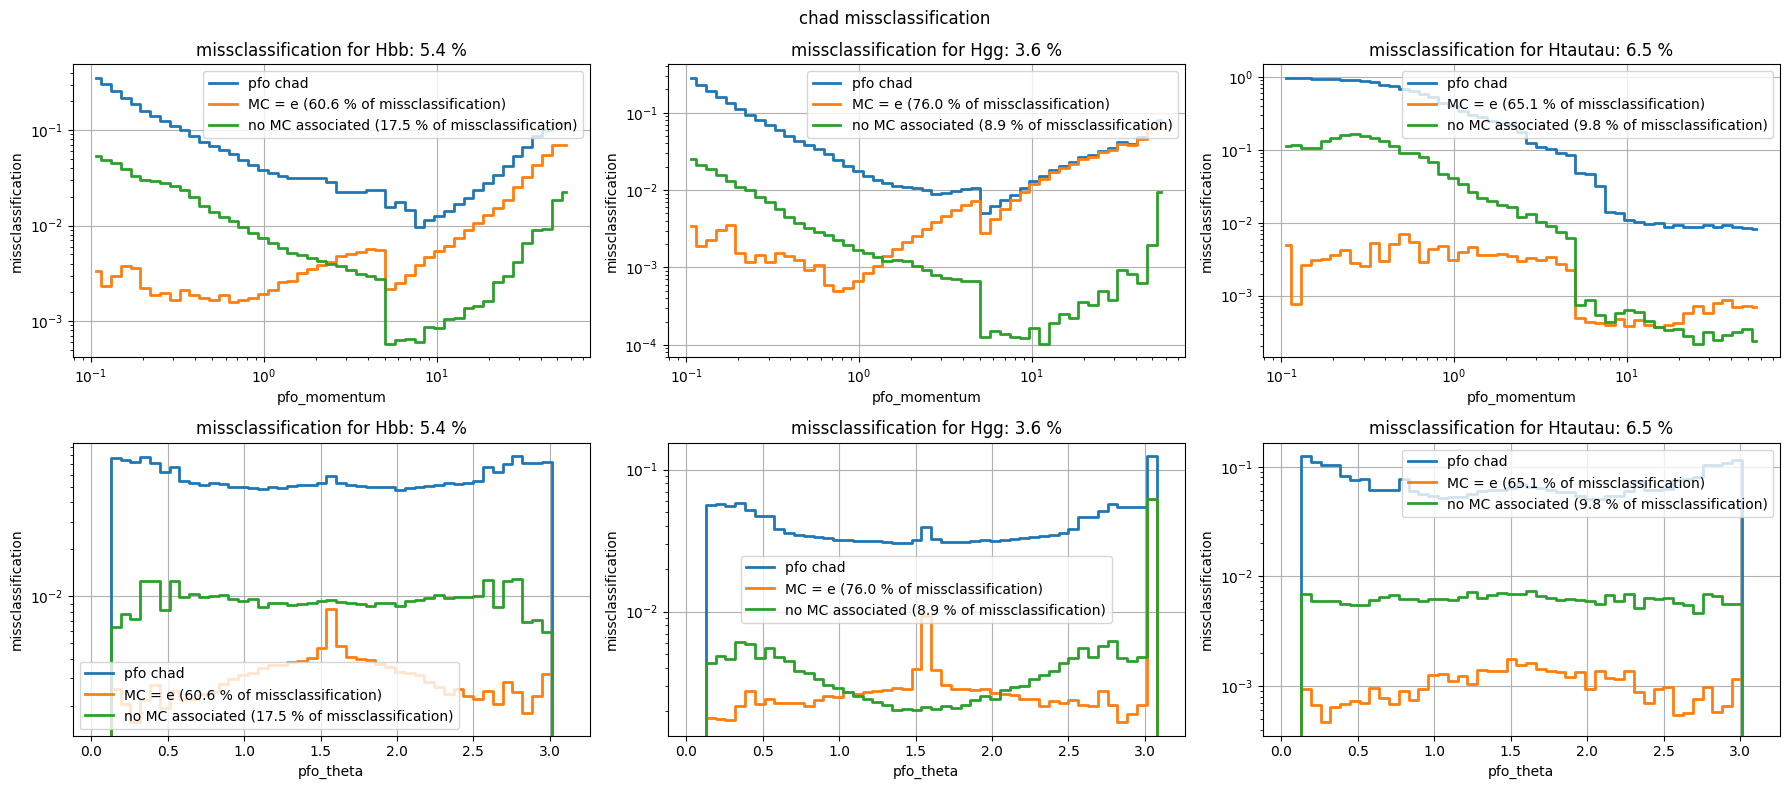

In [32]:
plot_fakerate_chad(save=save_status)

In [33]:
# create plot for neutral hadrons only 

def plot_fakerate_photon(log_p = True, save=False):
    num_bins=50
    #labels = ["e", "muon", "chad", "photon", "nhad"]
    labels = ["bb", "gg", "tautau"]
    ranges = [[0, 60], [0, 3.14]]
    fig, ax = plt.subplots(2, 3, figsize=(18, 8))
    #fig.suptitle(f"{Htype} missclassification ({np.round(fake_rate(Htype)*100, 1)} %)")
    fig.suptitle(f"Photon missclassification")
    for i, Htype in enumerate(labels):
        i_good_reco, i_wrong_reco = index_good_reco(Htype, ignore_sign=False)
        ind_e, ind_mu, ind_chad, ind_gamma, ind_nhad = ind_ptype(Htype)
        i_ptype = ind_gamma
        for j, obs in enumerate(["pfo_momentum", "pfo_theta"]):
            # Logarithmic binning for "momentum"
            if obs == "pfo_momentum" and log_p:
                bins = np.logspace(np.log10(ranges[j][0]+1e-1), np.log10(ranges[j][1]), num_bins)
                ax[j, i].set_xscale("log")
            else:
                bins = np.linspace(ranges[j][0], ranges[j][1], num_bins)

            ref_counts, bin_edges = np.histogram(np.concatenate(dic[Htype][obs])[i_ptype], range=ranges[j], bins=bins, density=False)
            ind_interest = np.intersect1d(i_wrong_reco, i_ptype)
            
            # check which is the highest confusion
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])[ind_interest])
            wrong_pid, counts = np.unique(abs(pfo_MCpid), return_counts=True)
            
            per_el = np.round(counts[np.where(wrong_pid==11)]*100/np.sum(counts), 1)
            per_noID= np.round(counts[np.where(wrong_pid==999)]*100/np.sum(counts), 1)

            # plot histo
            obs_data = np.concatenate(dic[Htype][obs])[ind_interest]
            normalized_obs_data = normalize_hist(obs_data, ref_counts, bins, range=ranges[j])
            bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Calculate bin centers for plotting
            fakerate_ptype = fake_rate_x(Htype, i_ptype, ind_interest)
            ax[j, i].set_title(f"missclassification for H{labels[i]}: {np.round(fakerate_ptype*100, 1)} %")
            ax[j, i].plot(bin_centers, normalized_obs_data, drawstyle='steps-mid', linewidth=2.0, label=r"pfo $\gamma$")#, label=f"MC {xtype}, track ({effi[2]} %)")
            ax[j, i].set_xlabel(f"{obs}")
            ax[j, i].set_ylabel("missclassification")

            # plots fractions for 221 and -999
            pfo_MCpid = to_had(np.concatenate(dic[Htype]["pfo_MCpid"])) 
            ind_211 = np.where(abs(pfo_MCpid) == 211)
            ind_nhad_act_chad = np.intersect1d(ind_interest, ind_211)
            ind_999 = np.where(abs(pfo_MCpid) == 999)
            ind_nhad_not_reco = np.intersect1d(ind_interest, ind_999)

            act_chad_data = np.concatenate(dic[Htype][obs])[ind_nhad_act_chad]
            normalized_act_chad_data = normalize_hist(act_chad_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_act_chad_data, drawstyle='steps-mid', linewidth=2.0, label=f"MC = e ({per_el[0]} % of missclassification)" )

            not_reco_data = np.concatenate(dic[Htype][obs])[ind_nhad_not_reco]
            normalized_not_reco_data = normalize_hist(not_reco_data, ref_counts, bins, range=ranges[j])
            ax[j, i].plot(bin_centers, normalized_not_reco_data, drawstyle='steps-mid', linewidth=2.0, label=f"no MC associated ({per_noID[0]} % of missclassification)" )




            #ax[j, i].hist(np.concatenate(dic[Htype]["pfo_momentum"])[i_ptype], bins=100, histtype='step', label=labels[i])
            ax[j, i].grid()
            ax[j, i].legend()
            #ax[j, i].set_ylim(0, 1.01)
            
            #ax[j, i].set_yscale('log')
    if save:
        plt.savefig(f"./hist-trackPFOcheck-missclassi/missclassi_photon.pdf")
    plt.tight_layout()
    plt.show()


/tmp/ipykernel_108763/1930759235.py:5: RuntimeWarning: invalid value encountered in divide
  normalized_counts = np.where(ref_counts > 0, counts / ref_counts, 0)


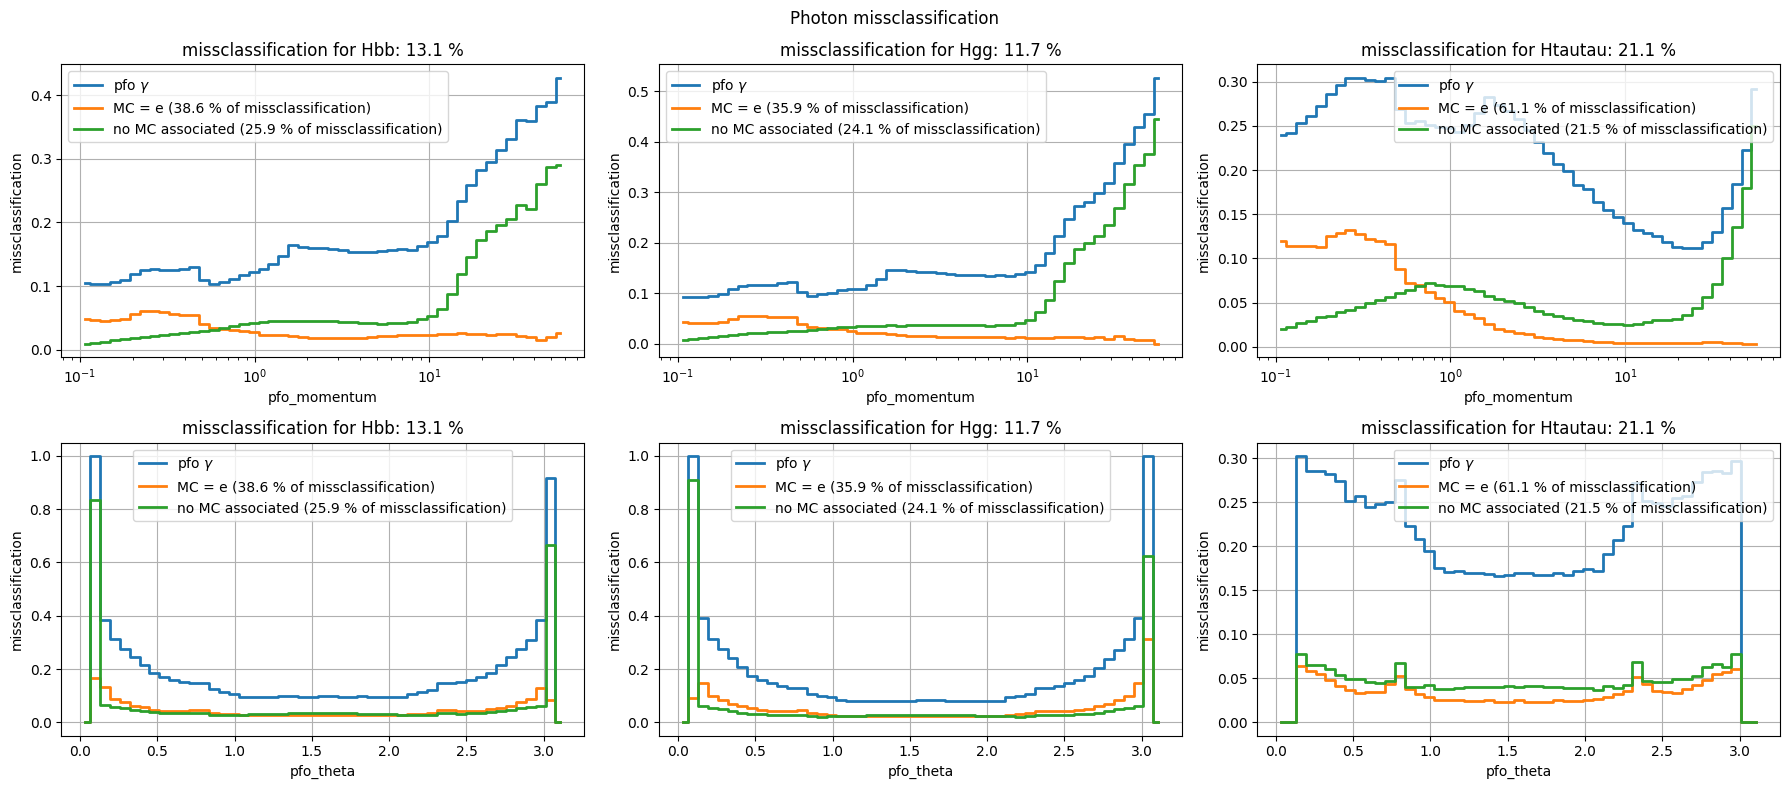

In [34]:
plot_fakerate_photon(save=save_status)